# Visualization libraries

In [144]:
#imports for visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Necessary Libraries

In [145]:
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import numpy as np

In [146]:
import nltk
from nltk.stem import WordNetLemmatizer


# For reading the file

In [147]:
import json
import pickle

In [148]:
#word reducer
Lemmatizer = WordNetLemmatizer()

# file directory
fileDirectory = "intents.json"

# Load Json File

In [149]:
def fileJsonDir(fileDirectory):
    """
    loads the data intent.json file, if the json file does not exist
    return File not found! 
    """
    try: 
        with open (fileDirectory) as c:
            dataIntent = json.load(c)
            return dataIntent
    except FileNotFoundError:
        print(f"File not Found!: {fileDirectory}")
dataIntent = fileJsonDir(fileDirectory)

In [150]:
def convert_to_list(words, categories, docs):
    """
    Convert per words to list 
    """
    for intent in dataIntent['intents']:
        for pattern in intent['patterns']:
            wordlist = nltk.word_tokenize(pattern)
            words.extend(wordlist)
            docs.append((wordlist, intent['tag']))
            if intent['tag'] not in categories:
                categories.append(intent['tag'])
    return words, categories, docs

In [151]:
def Lemmatize_words(words):
    """
    Lemmatize the words for easier comprehension
    """
    Lematized_list = []
    ignoreChars = ['?', '!', '.', ',']
    for chars in words:
        if chars not in ignoreChars:
            Lematized_list.append(Lemmatizer.lemmatize(chars))
    return Lematized_list


In [160]:
#Out put
words, categories, docs = convert_to_list([],[],[])
ignoreChars = ['?', '!', '.', ',']
print(words)
print(categories)
print(docs)

['Hi', 'greetings', 'Is', 'anyone', 'there', '?', 'Hello', 'Good', 'day', 'Whats', 'up', 'cya', 'See', 'you', 'later', 'Goodbye', 'I', 'am', 'Leaving', 'Have', 'a', 'Good', 'day', 'bye', 'terminate', 'check', 'time', 'what', 'time', 'is', 'it', '?', 'tell', 'me', 'the', 'time', 'time', 'date', 'Can', 'you', 'summarize', 'this', 'for', 'me', '?', 'Summarize', 'this', 'summarize', 'hover', 'up', 'go', 'up', 'up', 'hover', 'down', 'go', 'down', 'down', 'hover', 'Left', 'go', 'left', 'left', 'hover', 'right', 'go', 'right', 'right', 'stop', 'click', 'press', 'what', 'are', 'you', '?', 'who', 'are', 'you', '?', 'define', 'yourself', 'what', 'is', 'your', 'name', '?', 'tell', 'me', 'your', 'name', '?', 'state', 'your', 'name']
['greeting', 'goodbye', 'current_time', 'Summarization', 'hoverUP', 'hoverDown', 'hoverLeft', 'hoverRight', 'stop', 'mouseclick', 'personalInfor', 'personalInfoName']
[(['Hi'], 'greeting'), (['greetings'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['H

In [153]:
#Sort the lemmatized words
Lemmatized = Lemmatize_words(words)

words = sorted((set(Lemmatized)))
words

['Can',
 'Good',
 'Goodbye',
 'Have',
 'Hello',
 'Hi',
 'I',
 'Is',
 'Leaving',
 'Left',
 'See',
 'Summarize',
 'Whats',
 'a',
 'am',
 'anyone',
 'are',
 'bye',
 'check',
 'click',
 'cya',
 'date',
 'day',
 'define',
 'down',
 'for',
 'go',
 'greeting',
 'hover',
 'is',
 'it',
 'later',
 'left',
 'me',
 'name',
 'press',
 'right',
 'state',
 'stop',
 'summarize',
 'tell',
 'terminate',
 'the',
 'there',
 'this',
 'time',
 'up',
 'what',
 'who',
 'you',
 'your',
 'yourself']

# Save data for later use

In [154]:
#Save the lematice
pickle.dump(Lemmatized, open('UpdatedLemmatizedWords.pkl', 'wb'))
pickle.dump(categories, open('Updatedcategories.pkl', 'wb'))

In [162]:
trainer = []
outputEmpt = [0] * len(categories)

In [164]:
for doc in docs:
    bag = []    
    patterns = doc[0]

    #lemmatize the word pattern
    patterns = [Lemmatizer.lemmatize(word.lower()) for word in patterns]
    for word in words:
        #append if 1 in word if the word is on pattern.
        #if not, append 0
        bag.append(1) if word in patterns else bag.append(0)
    outputRow = list(outputEmpt)
    outputRow[categories.index(doc[1])] = 1
    trainer.append(bag + outputRow) #store value to list

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Initialize Data

In [129]:
random.shuffle(trainer)
training = np.array(trainer)
trainX = training[:, :len(words)]
trainY = training[:, len(words):]
print(len(trainX[0]))
print(trainY)

52
[[0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0

In [130]:
#Initializing the model
model = Sequential()
model.add(Dense(128, input_shape=(len(trainX[0]),), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(len(trainY[0]), activation='softmax'))

In [131]:
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Model Summary

In [132]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               6784      
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 12)                780       
                                                                 
Total params: 15820 (61.80 KB)
Trainable params: 15820 (61.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training model

In [133]:

hist = model.fit(np.array(trainX), np.array(trainY), epochs=300, batch_size=5, verbose=1)


Epoch 1/300


9/9 [==============================] - 1s 3ms/step - loss: 2.5095 - accuracy: 0.0238
Epoch 2/300
9/9 [==============================] - 0s 2ms/step - loss: 2.4687 - accuracy: 0.2381
Epoch 3/300
9/9 [==============================] - 0s 3ms/step - loss: 2.3807 - accuracy: 0.3333
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3712 - accuracy: 0.2143
Epoch 5/300
9/9 [==============================] - 0s 3ms/step - loss: 2.3040 - accuracy: 0.2381
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2430 - accuracy: 0.2857
Epoch 7/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1870 - accuracy: 0.3333
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0863 - accuracy: 0.3333
Epoch 9/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0358 - accuracy: 0.3571
Epoch 10/300
9/9 [==============================] - 0s 3ms/step - loss: 2.0515 - accuracy: 0.3095
Epoch 11/300
9/9 [=======================

In [134]:
fileSave = "UpdatedmyBot.h5"

model.save('UpdatedmyBot.h5', hist)
print('Done')

Done


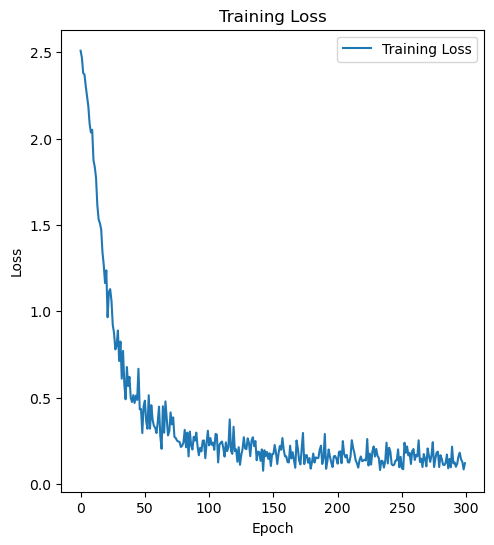

In [135]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

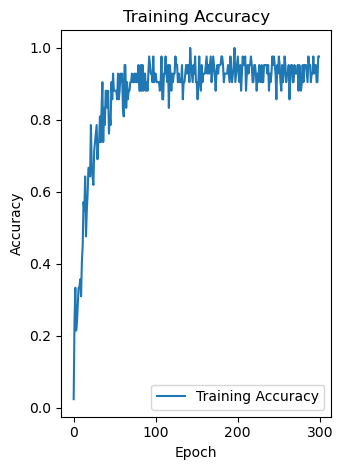

In [136]:
# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

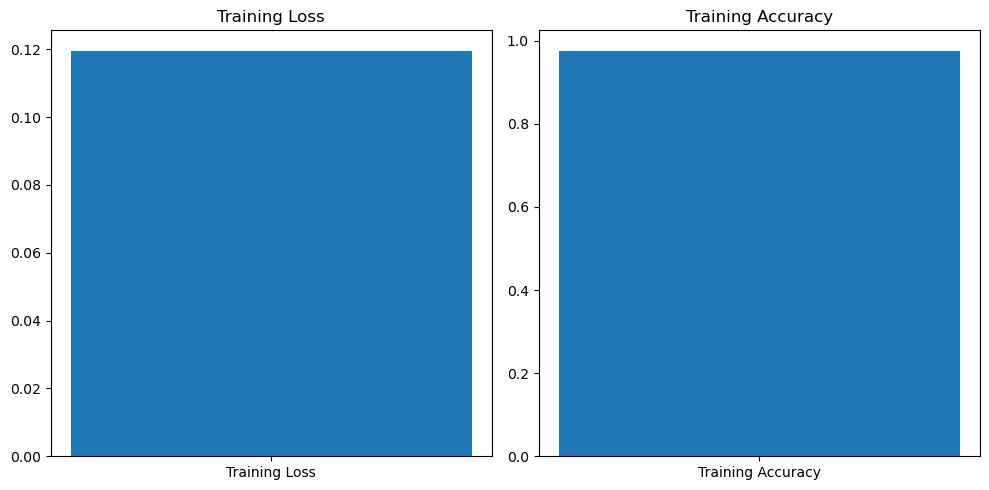

In [137]:
# Plot bar graph for training loss and accuracy
plt.figure(figsize=(10, 5))

# Bar graph for training loss
plt.subplot(1, 2, 1)
plt.bar(['Training Loss'], [hist.history['loss'][-1]])
plt.title('Training Loss')

# Bar graph for training accuracy
plt.subplot(1, 2, 2)
plt.bar(['Training Accuracy'], [hist.history['accuracy'][-1]])
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()

In [139]:
final_loss = hist.history['loss'][-1]
final_accuracy = hist.history['accuracy'][-1]

print(f'Final Training Loss: {final_loss}')
print(f'Final Training Accuracy: {final_accuracy}')

Final Training Loss: 0.11957801133394241
Final Training Accuracy: 0.976190447807312
